In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd, numpy as np
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
import joblib
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve,precision_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from imblearn.ensemble import RUSBoostClassifier,BalancedRandomForestClassifier #63 84
from imblearn.ensemble import BalancedBaggingClassifier #69 74
from sklearn.metrics import make_scorer, f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import OneSidedSelection
from collections import Counter
from imblearn.combine import SMOTEENN
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTEN
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler




重采样后的类别分布： Counter({3: 4491, 2: 4419, 0: 1797, 1: 1092})
原始数据: Counter({0: 6535, 1: 5725, 2: 788, 3: 236})
预测数据: Counter({0: 1964, 1: 1720, 2: 230, 3: 72})
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1964
           1       0.67      0.50      0.57      1720
           2       0.19      0.63      0.29       230
           3       0.37      0.42      0.39        72

    accuracy                           0.62      3986
   macro avg       0.50      0.57      0.50      3986
weighted avg       0.70      0.62      0.65      3986

Recall: 0.62 Accuracy: 62.39


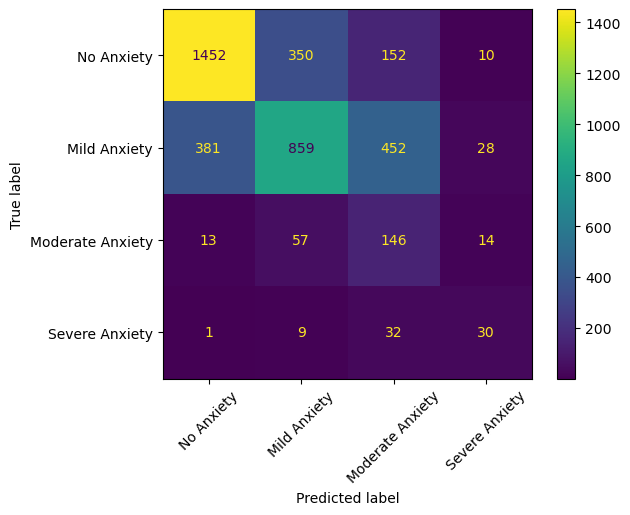

ROC AUC:  0.7160782695641127
F1:  0.6466693207410781


In [24]:
data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康-交集特征-数据集.csv')
from sklearn.preprocessing import label_binarize
data = data.drop(['depression', 'suicide'], axis=1)
y = data['anxiety']
X = data.drop('anxiety', axis=1)
random_state = 42
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
# 过采样
smote = SMOTEENN(random_state=random_state)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
print("重采样后的类别分布：", Counter(y_train_resampled))

# cc = SMOTETomek(random_state=42) ##0.7250354945575012
# cc = ADASYN(random_state=20) ###0.7279455
# cc = SMOTEENN(random_state=42)
# X_res, y_res = cc.fit_resample(x_train,y_train)
print("原始数据:", Counter(y))
# print("Resmaple后数据:",Counter(y_res))
brfc = RandomForestClassifier(random_state=random_state, n_estimators=200)
brfc.fit(x_train_resampled, y_train_resampled)
y_pred = brfc.predict(x_test)

print("预测数据:", Counter(y_test))
# cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

recall = recall_score(y_test, y_pred, average='weighted')
lb = LabelBinarizer()
lb.fit(y_test)
y_test_b = lb.transform(y_test)
y_pred_b = lb.transform(y_pred)
roc_auc = roc_auc_score(y_test_b, y_pred_b,multi_class='ovo')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: %.2f' % recall,'Accuracy: %.2f' % (accuracy*100))

# 绘制混淆矩阵
label_dict = {
    0: 'No Anxiety',
    1: 'Mild Anxiety',
    2: 'Moderate Anxiety',
    3: 'Severe Anxiety'
}
y_test_text = [label_dict[label] for label in y_test]
y_pred_text = [label_dict[label] for label in y_pred]
cm_text = confusion_matrix(y_test_text, y_pred_text, labels=list(label_dict.values()))

disp_text = ConfusionMatrixDisplay(confusion_matrix=cm_text, display_labels=list(label_dict.values()))
disp_text.plot()
plt.xticks(rotation=45)
plt.show()

print('ROC AUC: ', roc_auc)
print('F1: ', f1)

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average='weighted'),
           'recall': make_scorer(recall_score, average='weighted'),
           'f1': make_scorer(f1_score, average='weighted'),
           'roc_auc': make_scorer(roc_auc_score, average='ovo')}
# Perform 5-fold cross-validation on the model
# cv = StratifiedKFold(n_splits=3)

# cv_results = cross_validate(brfc, X, y, cv=cv, scoring=scoring)
# print(cv_results)
# # Print the average score for each metric
# print(cv_results['test_accuracy'])
# print(cv_results['test_precision'])
# print(cv_results['test_recall'])
# print(cv_results['test_f1'])
# roc_auc_scores = cv_results['test_roc_auc']
# print(roc_auc_scores)




重采样后的类别分布： Counter({2: 7533, 1: 7028, 0: 3950})
预测数据: Counter({0: 3291, 1: 613, 2: 82})
              precision    recall  f1-score   support

           0       0.93      0.72      0.81      3291
           1       0.31      0.69      0.43       613
           2       0.30      0.20      0.24        82

    accuracy                           0.70      3986
   macro avg       0.51      0.54      0.49      3986
weighted avg       0.82      0.70      0.74      3986

Recall: 0.70 Accuracy: 70.50


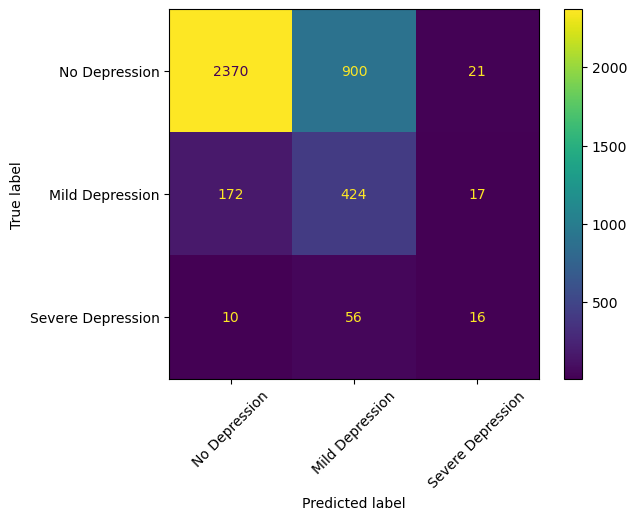

ROC AUC:  0.675319456378813
F1:  0.7400570551081406
[0.76355014 0.78116531 0.79177958]
[0.7981081  0.79772839 0.78474397]
[0.76355014 0.78116531 0.79177958]
[0.77677121 0.78869802 0.78809046]
[nan nan nan]


In [23]:
data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康-交集特征-数据集.csv')
random_state = 42

data = data.drop(['anxiety', 'suicide'], axis=1)
y = data['depression']
X = data.drop('depression', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=random_state)

# 过采样
smote = SMOTEENN(random_state=random_state)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
print("重采样后的类别分布：", Counter(y_train_resampled))

# cc = SMOTETomek(random_state=42) ##0.7250354945575012
# cc = ADASYN(random_state=42) ###0.7279455
# cc = SMOTEENN(random_state=42)
# X_res, y_res = cc.fit_resample(x_train,y_train)
# print("Resmaple后数据:",Counter(y_res))

brfc = RandomForestClassifier(random_state=random_state, n_estimators=50, class_weight='balanced',min_samples_leaf = 4, min_samples_split = 5)
brfc.fit(x_train_resampled, y_train_resampled)
y_pred = brfc.predict(x_test)

print("预测数据:", Counter(y_test))
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

recall = recall_score(y_test, y_pred, average='weighted')
lb = LabelBinarizer()
lb.fit(y_test)
y_test_b = lb.transform(y_test)
y_pred_b = lb.transform(y_pred)
roc_auc = roc_auc_score(y_test_b, y_pred_b,multi_class='ovo')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: %.2f' % recall,'Accuracy: %.2f' % (accuracy*100))
# 绘制混淆矩阵
label_dict = {
    0: 'No Depression',
    1: 'Mild Depression',
    2: 'Severe Depression'
}
y_test_text = [label_dict[label] for label in y_test]
y_pred_text = [label_dict[label] for label in y_pred]
cm_text = confusion_matrix(y_test_text, y_pred_text, labels=list(label_dict.values()))

disp_text = ConfusionMatrixDisplay(confusion_matrix=cm_text, display_labels=list(label_dict.values()))
disp_text.plot()
plt.xticks(rotation=45)
plt.show()

print('ROC AUC: ', roc_auc)
print('F1: ', f1)

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average='weighted'),
           'recall': make_scorer(recall_score, average='weighted'),
           'f1': make_scorer(f1_score, average='weighted'),
           'roc_auc': make_scorer(roc_auc_score, average='ovo')}
# Perform 5-fold cross-validation on the model
cv = StratifiedKFold(n_splits=3)

cv_results = cross_validate(brfc, X, y, cv=cv, scoring=scoring)
# Print the average score for each metric
print(cv_results['test_accuracy'])
print(cv_results['test_precision'])
print(cv_results['test_recall'])
print(cv_results['test_f1'])
roc_auc_scores = cv_results['test_roc_auc']
print(roc_auc_scores)


重采样后的类别分布： Counter({2: 7533, 1: 7028, 0: 3950})
预测数据: Counter({0: 3291, 1: 613, 2: 82})
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      3291
           1       0.32      0.66      0.43       613
           2       0.28      0.22      0.24        82

    accuracy                           0.72      3986
   macro avg       0.50      0.54      0.50      3986
weighted avg       0.82      0.72      0.75      3986

Recall: 0.72 Accuracy: 71.55


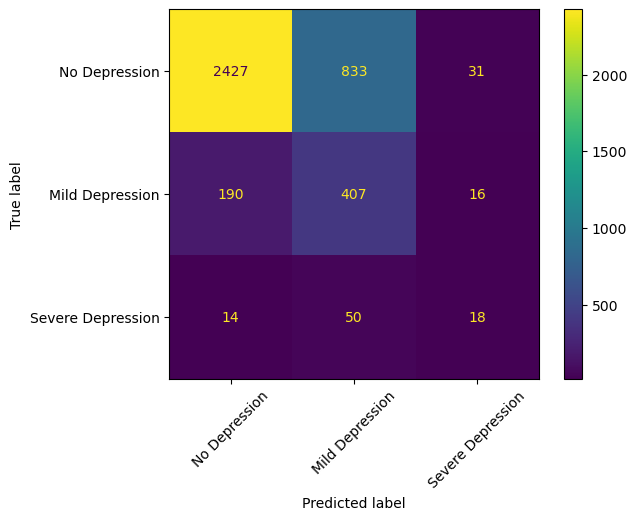

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康-交集特征-数据集.csv')
random_state = 42

data = data.drop(['anxiety', 'suicide'], axis=1)
y = data['depression']
X = data.drop('depression', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=random_state)

# 过采样
smote = SMOTEENN(random_state=random_state)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
print("重采样后的类别分布：", Counter(y_train_resampled))

brfc = xgb.XGBClassifier(objective='multi:softprob',random_state=random_state, n_estimators=50)
brfc.fit(x_train_resampled, y_train_resampled)
y_pred = brfc.predict(x_test)
print("预测数据:", Counter(y_test))
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)
recall = recall_score(y_test, y_pred, average='weighted')
lb = LabelBinarizer()
lb.fit(y_test)
y_test_b = lb.transform(y_test)
y_pred_b = lb.transform(y_pred)
roc_auc = roc_auc_score(y_test_b, y_pred_b,multi_class='ovo')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: %.2f' % recall,'Accuracy: %.2f' % (accuracy*100))
# 绘制混淆矩阵
label_dict = {
    0: 'No Depression',
    1: 'Mild Depression',
    2: 'Severe Depression'
}
y_test_text = [label_dict[label] for label in y_test]
y_pred_text = [label_dict[label] for label in y_pred]
cm_text = confusion_matrix(y_test_text, y_pred_text, labels=list(label_dict.values()))

disp_text = ConfusionMatrixDisplay(confusion_matrix=cm_text, display_labels=list(label_dict.values()))
disp_text.plot()
plt.xticks(rotation=45)
plt.show()


重采样后的类别分布： Counter({0: 7922, 1: 4906})
预测数据: Counter({1: 3605, 0: 381})
              precision    recall  f1-score   support

           0       0.24      0.55      0.34       381
           1       0.95      0.82      0.88      3605

    accuracy                           0.79      3986
   macro avg       0.59      0.68      0.61      3986
weighted avg       0.88      0.79      0.82      3986

Recall: 0.79 Accuracy: 79.05


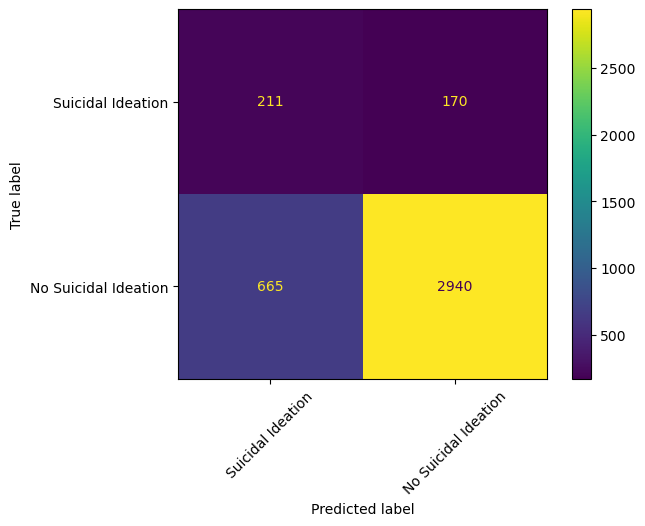

ROC AUC:  0.6846698774303697
F1:  0.8240424136146891
Accuracy:  0.8978471564088494
Precision:  0.9008609289610728
Recall:  0.9958073739019191
F1 score:  0.945953880571477


In [22]:
data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017-科技人员心理健康-交集特征-数据集.csv')
random_state=42
data = data.drop(['depression', 'anxiety'], axis=1)
y = data['suicide']
X = data.drop('suicide', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=random_state)

# 过采样
smote = SMOTEENN(random_state=random_state)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
print("重采样后的类别分布：", Counter(y_train_resampled))

# cc = SMOTETomek(random_state=42) ##0.7250354945575012
# cc = ADASYN(random_state=42) ###0.7279455
# cc = SMOTEENN(random_state=42)
# X_res, y_res = cc.fit_resample(x_train,y_train)
# x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# print("Resmaple后数据:",Counter(y_res))
brfc = RandomForestClassifier(random_state=random_state, n_estimators=100,min_samples_leaf=2, min_samples_split=2)
brfc.fit(x_train_resampled, y_train_resampled)
y_pred = brfc.predict(x_test)

print("预测数据:", Counter(y_test))
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

recall = recall_score(y_test, y_pred, average='weighted')
lb = LabelBinarizer()
lb.fit(y_test)
y_test_b = lb.transform(y_test)
y_pred_b = lb.transform(y_pred)
roc_auc = roc_auc_score(y_test_b, y_pred_b)
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: %.2f' % recall,'Accuracy: %.2f' % (accuracy*100))
# 绘制混淆矩阵

label_dict = {
    0: 'Suicidal Ideation',
    1: 'No Suicidal Ideation'
}
y_test_text = [label_dict[label] for label in y_test]
y_pred_text = [label_dict[label] for label in y_pred]
cm_text = confusion_matrix(y_test_text, y_pred_text, labels=list(label_dict.values()))

disp_text = ConfusionMatrixDisplay(confusion_matrix=cm_text, display_labels=list(label_dict.values()))
disp_text.plot()
plt.xticks(rotation=45)
plt.show()
print('ROC AUC: ', roc_auc)
print('F1: ', f1)

scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform 5-fold cross-validation on the model

cv_results = cross_validate(brfc, X, y, cv=5, scoring=scoring)

# Print the average score for each metric
print("Accuracy: ", cv_results['test_accuracy'].mean())
print("Precision: ", cv_results['test_precision'].mean())
print("Recall: ", cv_results['test_recall'].mean())
print("F1 score: ", cv_results['test_f1'].mean())

